The 2014 Inc. 5000- Inc5000 Companylist

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [3]:
# Reading the data
Incdata=pd.read_csv("Company List_2014.csv")

In [6]:
Incdata.head(2)

,_input,_num,_widgetName,_source,_resultNumber,_pageUrl,id,rank,workers,company,url,state_l,state_s,city,metro,growth,revenue,industry,yrs_on_list
0,NaN,1,Inc5000 Company List,Inc5000 Company List,1,http://www.inc.com/inc5000list/json/inc5000_20...,22890,1,227,Fuhu,fuhu,California,CA,El Segundo,Los Angeles,158956.9106,195640000,Consumer Products & Services,2
1,NaN,2,Inc5000 Company List,Inc5000 Company List,2,http://www.inc.com/inc5000list/json/inc5000_20...,25747,2,191,Quest Nutrition,quest-nutrition,California,CA,El Segundo,Los Angeles,57347.9246,82640563,Food & Beverage,1


1.Top 20 different types of industries in the data

In [19]:
Incdata['industry'].value_counts().head(20)

IT Services                     733
Advertising & Marketing         453
Business Products & Services    435
Health                          377
Software                        338
Financial Services              278
Consumer Products & Services    230
Manufacturing                   212
Government Services             212
Retail                          200
Human Resources                 199
Construction                    198
Telecommunications              135
Logistics & Transportation      132
Food & Beverage                 132
Real Estate                     131
Energy                          116
Education                        78
Security                         68
Insurance                        67
Name: industry, dtype: int64

2.Top 20 states which utilizes highest man power 

In [49]:
data=Incdata.groupby('state_l').sum().workers.reset_index()
#data.sort_values('workers',ascending=False)

In [51]:
data.sort_values('workers',ascending=False).head(20)

,state_l,workers
4,California,147025
44,Texas,100812
13,Illinois,98148
32,New York,77441
22,Michigan,56082
10,Georgia,47641
43,Tennessee,45229
20,Maryland,42672
9,Florida,42672
47,Virginia,42355


3.The ranking is based on growth speed, so creating a growth vs ranking graph to confirm that

<AxesSubplot:xlabel='rank'>

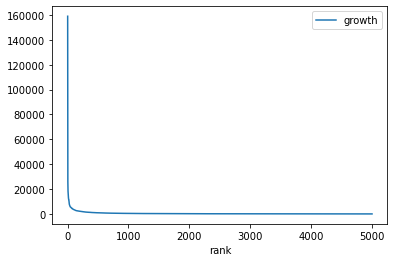

In [8]:
Incdata.plot(x="rank",y="growth")

In [ ]:
# This graph looks bigger the growth higher the ranking which looks right

4.what is the distribution of years on list across the companies

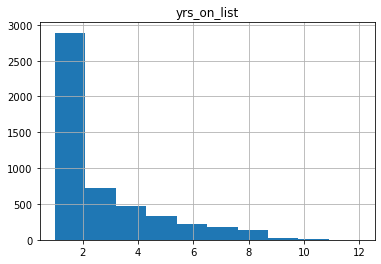

In [9]:
hist=Incdata.hist(column="yrs_on_list")

In [ ]:
#looks like it is the first year on the list for most companies 

5.Does higher ranking means bigger revenue of the company

<AxesSubplot:xlabel='rank', ylabel='revenue'>

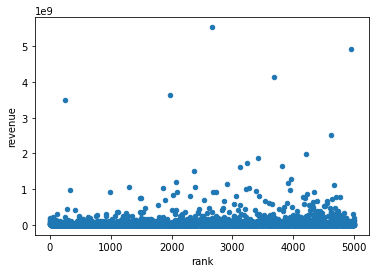

In [10]:
x=Incdata[["rank"]]
y=Incdata[["revenue"]]
Incdata.plot(kind="scatter",x="rank",y="revenue")

In [ ]:
#Most companies has small revenues and ranking does not reflect the size of revenue

6.Does companies with more workers rank higher

<AxesSubplot:xlabel='rank', ylabel='revenue'>

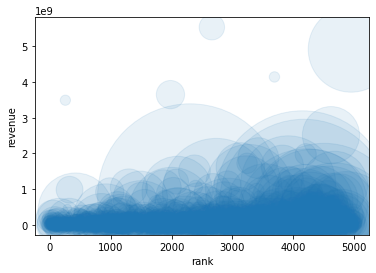

In [12]:
size=Incdata[['workers']]
Incdata[['rank','revenue']].plot(kind='scatter',x='rank',y='revenue', s=size, alpha=.1 )


In [ ]:
#result: No, in fact the more workers a company has the slower the growth

7.Relationship of no. of workers to revenue

<AxesSubplot:xlabel='workers', ylabel='revenue'>

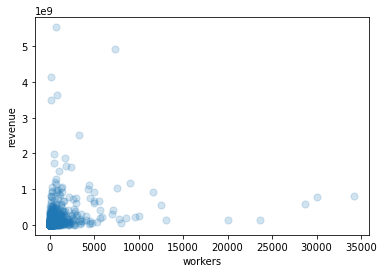

In [13]:
Incdata[['workers','revenue']].plot(kind='scatter',x='workers',y='revenue', s=50, alpha=.2 )

8.Show the proportion of the companies listed that are of the IT Services industry as a pie chart

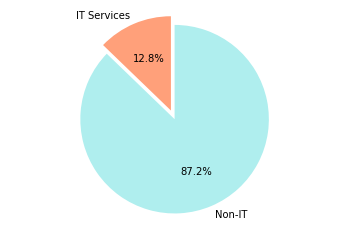

In [55]:
ITServices = Incdata.loc[Incdata['industry']=='IT Services'].count()[1]
Non_IT=Incdata.loc[Incdata['industry']!='Non-IT'].count()[1]

colors =['LightSalmon',"PaleTurquoise"]
labels = 'IT Services', 'Non-IT'
sizes = [ITServices, Non_IT ]
explode = (0, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        colors=colors, shadow=False, startangle=90)
ax1.axis('equal')  

plt.show()